In [1]:
import pandas as pd
import numpy as np
import pickle, os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('new1_data_70.csv')
data_test = pd.read_csv('new1_data_30.csv')

train_y = data['Bad_label']
test_y = data_test['Bad_label']


data = data.drop(['Bad_label','Unnamed: 0'], axis=1)
data_test = data_test.drop(['Bad_label','Unnamed: 0'], axis=1)


In [3]:
features = list(data.columns)

In [5]:
#print(features)

In [6]:
#data.describe()

In [7]:
data.shape

(23896, 68)

In [8]:
train_y.shape

(23896,)

In [9]:
train_x = data.values
test_x = data_test.values

In [10]:
def model_fit(clf, X, y):
    clf.fit(X, y)
    return clf 

def model_prediction(clf, X):
    pred = clf.predict(X)
    return pred

In [11]:
def get_model(fileName):
    output = open(fileName, 'rb')
    le = pickle.load(output)
    output.close()
    return le

def set_model(clf, fileName):
    output = open(fileName, 'wb')
    pickle.dump(clf, output)
    output.close()

In [19]:

from imblearn.ensemble import BalancedRandomForestClassifier

max_gini = 0

for i in range(1,25):
    for j in range(1, 40):
        model= BalancedRandomForestClassifier(n_estimators=18, max_features="sqrt",min_samples_leaf=34,class_weight="balanced_subsample")
        model = model_fit(model, train_x, train_y)
        preds = model_prediction(model , test_x)
        pred_prob = pd.DataFrame(model.predict_proba(test_x), columns=['Col_0', 'Col_1'])
        pred_prob = pred_prob['Col_1']
        AUC = roc_auc_score(np.array(test_y), np.array(pred_prob.tolist()))
        gini_index = (2* round(AUC, 2)) - 1
        if max_gini < gini_index:
            max_gini = gini_index
            best_model = model
print (max_gini)

0.3400000000000001


In [20]:
featues_importance = sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), features), reverse=True)
#print (best_model.get_params())
for i in featues_importance:
    print (i)
set_model(best_model, 'BalancedRandomForestClassifier.pkl')

(0.0969, 'feature_7')
(0.0674, 'mean_cash_limit')
(0.0674, 'feature_52')
(0.0629, 'total_credit_limit')
(0.0518, 'average_diff_lastpaymt_opened_dt')
(0.0461, 'feature_3')
(0.0435, 'payment_history_variable_length')
(0.0397, 'Enquiries365')
(0.0362, '#Enquiries90')
(0.0315, 'mean_credit_limit')
(0.031, 'total_diff_lastpaymt_opened_dt')
(0.03, 'mean_diff_open_enquiry_dt')
(0.0289, 'mean_cur_bal_amt')
(0.0282, 'ratio_currbalance_creditlimit')
(0.0269, 'perc_unsecured_others')
(0.0233, 'feature_29')
(0.0232, 'feature_50')
(0.0216, 'feature_66')
(0.0191, 'feature_35')
(0.0184, 'total_cur_bal_amt')
(0.0183, 'payment_history_avg_dpd_0_29_bucket')
(0.0143, 'feature_39')
(0.0139, 'feature_12')
(0.0134, 'feature_30')
(0.0103, 'feature_41')
(0.0099, 'feature_69')
(0.0098, 'min_months_last_30_plus')
(0.0097, 'feature_43')
(0.0093, 'feature_36')
(0.0092, 'max_freq_enquiry')
(0.0068, 'feature_26')
(0.0063, 'feature_56')
(0.0062, 'feature_40')
(0.0057, 'feature_4')
(0.0056, 'feature_65')
(0.0056, 'fe

In [21]:
features = np.array(features)
importances = best_model.feature_importances_
indices = np.argsort(importances)

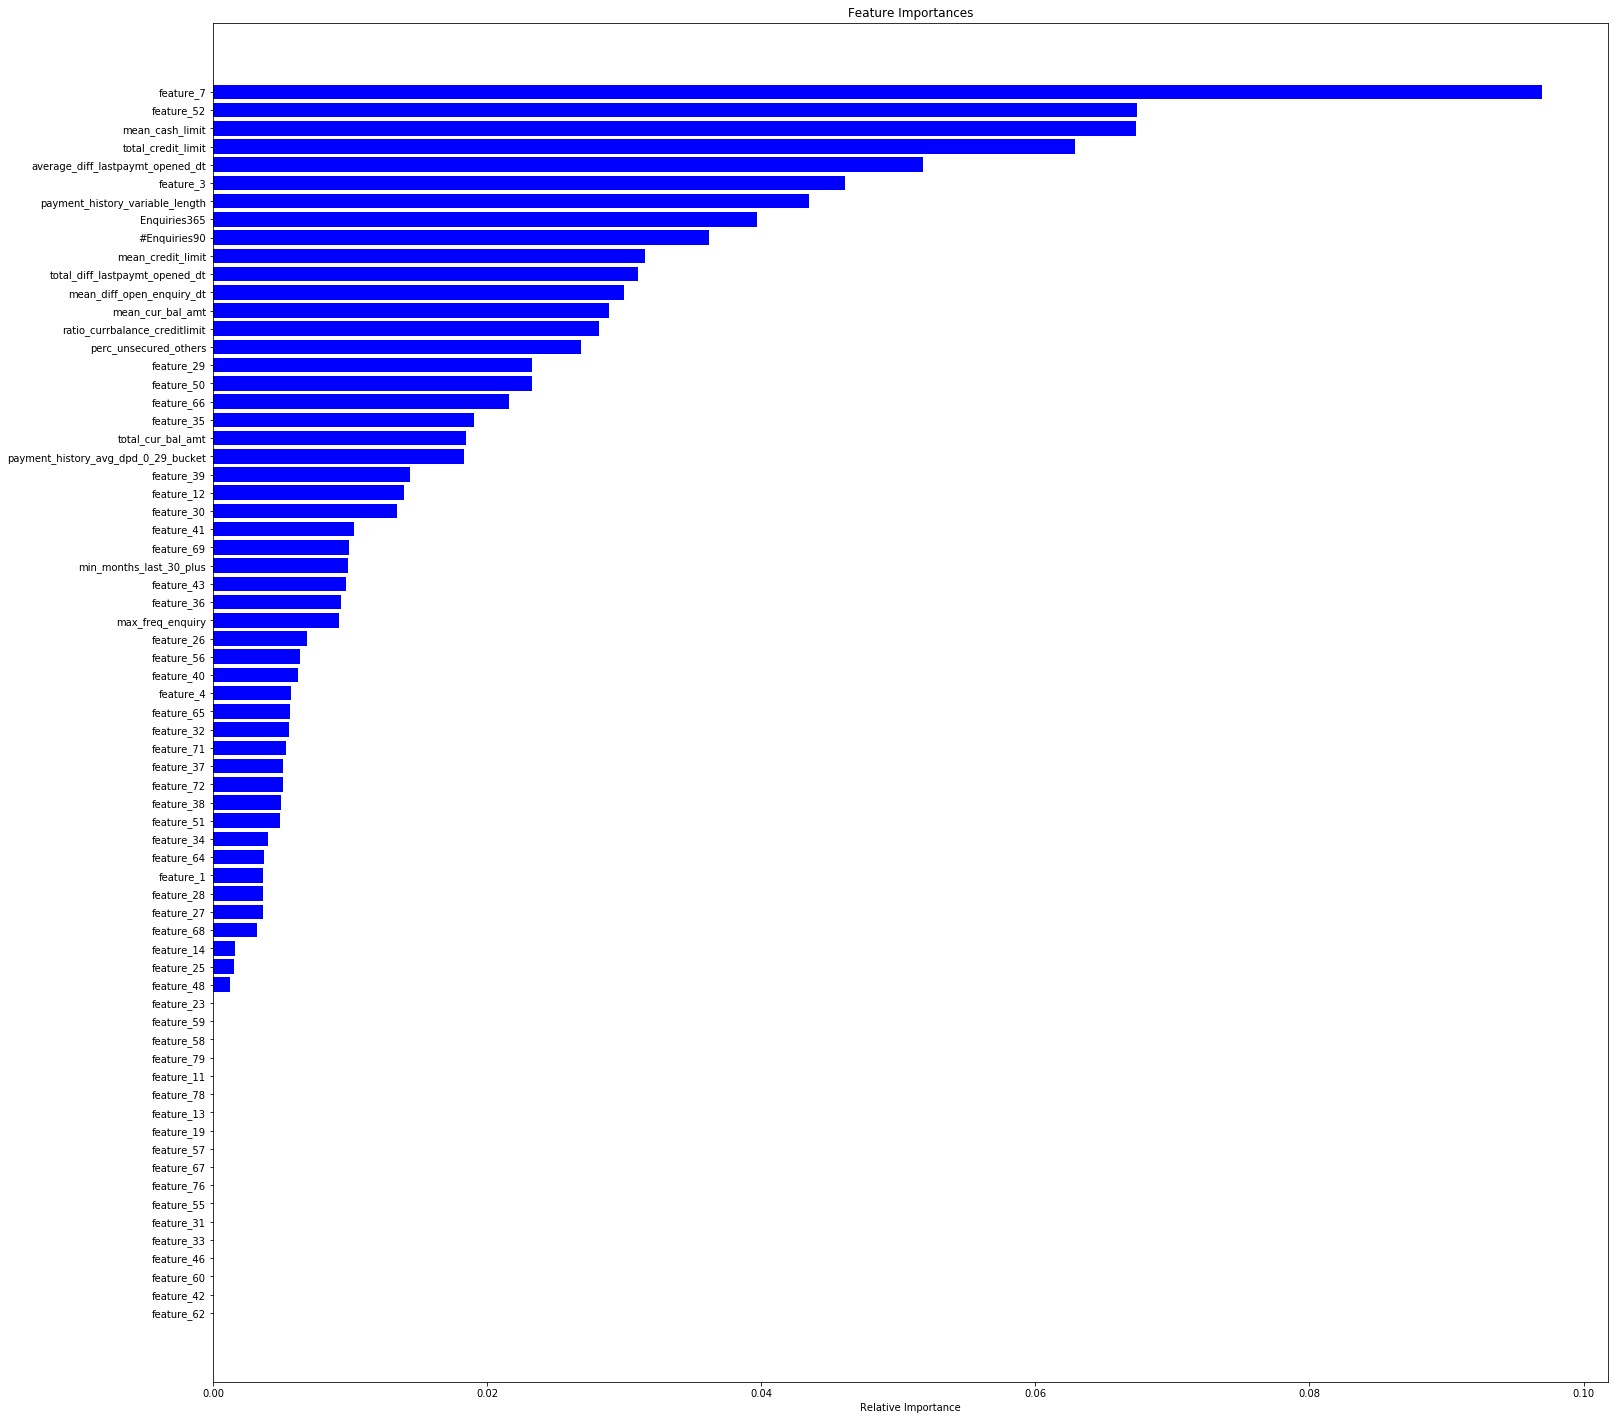

In [22]:
# Plot Feature Importance

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(25,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
#print max_metric
model = get_model('RandomForestClassifier2.pkl')
preds = model_prediction(model , test_x)
pred_prob = pd.DataFrame(model.predict_proba(test_x), columns=['Col_0', 'Col_1']) 
pred_prob = pred_prob['Col_1']

AUC = roc_auc_score(np.array(test_y), np.array(pred_prob.tolist()))
# Calculate gini index
gini_index = (2*AUC) - 1
print ('Gini Index', gini_index)

Gini Index 0.33138709657425136
